 Анастасия Плавина

# Анализ рынка жилой недвижимости в г. Мельбурн (Авcтралия)

## 1. Цели проекта и описание датасета:

Анализ выполняется на материале [набора данных](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv) (последнее обновление 08.06.2018), состоящего из 34 857 объектов, собранных с сайта недвижимости [Domain.com.au](https://www.domain.com.au/).

**Цель** данного проекта - проанализировать и найти закономерности в данных по недвижимости Мельбурна за 2016-2018 гг.

Ход работы:
1. Подготовить данные (очистить и обработать пропуски)
2. Проанализировать распределения зависимой переменной и независимых характеристик
3. Произвести корреляционный анализ
4. При помощи дисперсионного анализа проанализировать влияние категориальных переменных на зависимую переменную
5. Применить метод главных компонент к количественным признакам с целью понижения размерности
6. Проверить гипотезы о зависимостях и построить уравнение линейной регрессии


### 1.1 Пояснение характеристик

**Зависимая переменная - Price**: цена в австралийских долларах

**Независимые характеристики:**

- Suburb: район

- Address: адрес

- Rooms: кол-во комнат

- Method: метод продажи

S - собственность продана; \
SP - собственность продана досрочно; \
PI - property passed in; \
PN - собственность продана досрочно, стоимость не разглашается; \
SN - собственность продана, стоимость не разглашается; \
NB - без ставки; \
VB - ставка ставка продавца; \
W - снята с продажи до аукциона;\
SA -  продана после аукциона;\
SS - продана после аукциона, стоимость не разглашается;\
N/A - стоимость или максимальная ставка не указаны.

- Type: тип объекта

br - комната;\
h - дом, коттедж, вилла, полудюплекс, терраса;\
u - дюплекс;\
t - таунхаус;\
dev site - район застройки;\
o res - иное жилое помещение.

- SellerG: риелтор

- Date: дата продажи

- Distance: расстояние до делового центра (CBD) в км

- Postcode: почтовый индекс

- Regionname: регион (West, North West, North, North east … т.д.)

- Propertycount: количество объектов недвижимости в районе

- Bedroom2 : кол-во спален (from different source)

- Bathroom: кол-во ванных комнат

- Car: кол-во мест для машин

- Landsize: площадь участка в метрах

- BuildingArea: площадь дома в метрах

- YearBuilt: год постройки

- CouncilArea: название муниципалитета

- Latitude: широта

- Longtitude: долгота

### 1.2 Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.shape

(34857, 21)

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## 2. Исследуем зависимую переменную

### 2.1 Распределение, описательные характеристики

In [7]:
target = df['Price']
target_mean = target.mean()
target_median = target.median()

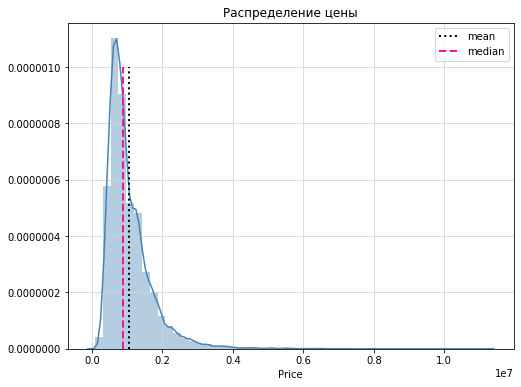

Коэффицент ассиметрии: 2.5889693410528607
Коэффициент эксцесса: 13.09720051555638


In [8]:
plt.figure(figsize = (8, 6))
sns.distplot(df['Price'], color='steelblue')

n = np.linspace(0, 0.000001, 100)
plt.plot([target_mean] * 100, n, label='mean', linestyle=':', linewidth=2, c='k')
plt.plot([target_median] * 100, n, label='median', linestyle='--', linewidth=2, c ='deeppink')

plt.title('Распределение цены')
plt.grid(c='lightgray')
plt.legend()
plt.show()

print(f'Коэффицент ассиметрии: {target.skew()}')
print(f'Коэффициент эксцесса: {target.kurt()}')

### 2.2. Исследование на нормальность

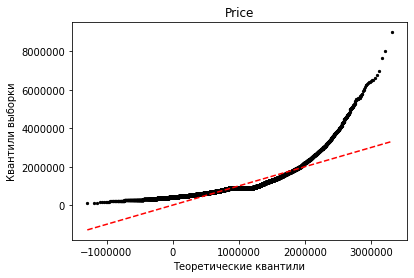

In [52]:
loc = df['Price'].mean()
scale = df['Price'].std()

interval = np.linspace(0, 1, df['Price'].shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(df['Price'], interval)

plt.scatter(x, y, s=5, c='k')
plt.plot(x, x, color='r', linestyle='--')


plt.title('Price')
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили выборки')
plt.show()

Итак, распределение зависимой переменной имеет ярко выраженный пик, длинный "хвост" и достаточно приближенно к нормальному. 

## 3. Исследуем факторы

### 3.1. Анализ пропусков

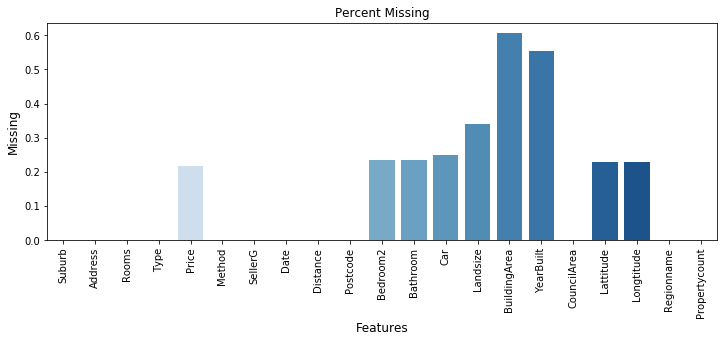

In [10]:
nan_df = (df.isna().sum() / df.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(12,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'], palette='Blues')
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Наибольшое количество пропусков содержится в значениях площади объекта и его года постройки. Для целей дальнейшего анализа пропуски заменяются на медианные значения.

### 3. 2. Очистка данных:

In [11]:
class FeatureImputer:
    """Заполнение пропусков и обработка выбросов"""
    
    def __init__(self):
        self.medians=None
        
    def fit(self, X):
        # задаем медианы
        self.medians = X.median()
        self.modes = X.mode()
        
            
    def transform(self, X):
        
        # Обработка пропусков в данных
        
        X['Price'].fillna(self.medians['Price'], inplace=True) 
        X['Car'].fillna(self.medians['Car'], inplace=True)
        X['Rooms'].fillna(self.medians['Rooms'], inplace=True)
        X['YearBuilt'].fillna(self.medians['YearBuilt'], inplace=True)
        X['Bedroom2'].fillna(self.medians['Bedroom2'], inplace=True)
        X['Bathroom'].fillna(self.medians['Bathroom'], inplace=True)
        X['Postcode'].fillna(self.medians['Postcode'], inplace=True)
        X['Method'].fillna(self.modes['Method'][0], inplace=True)
        X['CouncilArea'].fillna(self.modes['CouncilArea'][0], inplace=True)
        X['Regionname'].fillna(self.modes['Regionname'][0], inplace=True)
        X['Distance'].fillna(self.modes['Distance'][0], inplace=True)
        X['BuildingArea'].fillna(self.medians['BuildingArea'], inplace=True)
        X['Landsize'].fillna(self.medians['Landsize'], inplace=True)
        X['Lattitude'].fillna(self.medians['Lattitude'], inplace=True)
        X['Longtitude'].fillna(self.medians['Longtitude'], inplace=True)
        X['YearBuilt'].fillna(self.medians['YearBuilt'], inplace=True)
        
        
        # Обработка выбросов в данных
        X.loc[X['Bathroom'] >= 6, 'Bathroom'] = self.medians['Bathroom']
        X.loc[X['Bedroom2'] >= 10, 'Bedroom2'] = self.medians['Bedroom2']
        X.loc[X['BuildingArea'] > 1000, 'BuildingArea'] = self.medians['BuildingArea']
        X.loc[X['BuildingArea'] == 0, 'BuildingArea'] = self.medians['BuildingArea']
        X.loc[X['BuildingArea'].isna(), 'BuildingArea'] = X.loc[X['BuildingArea'].isna(), 'Landsize'] // 2
        X.loc[X['Car'] > 8, 'Car'] = self.medians['Car']
        X.loc[X['Landsize'] > 1000, 'Landsize'] = self.medians['Landsize']
        X.loc[X['Landsize'] == 0, 'Landsize'] = self.medians['Landsize']
        X.loc[X['YearBuilt'] > 2020, 'YearBuilt'] = self.medians['YearBuilt']
        X.loc[X['YearBuilt'] < 1800, 'YearBuilt'] = self.medians['YearBuilt']

        return X

In [12]:
imputer = FeatureImputer()
imputer.fit(df)

df = imputer.transform(df)

### 3.3. Распределения количественных переменных:

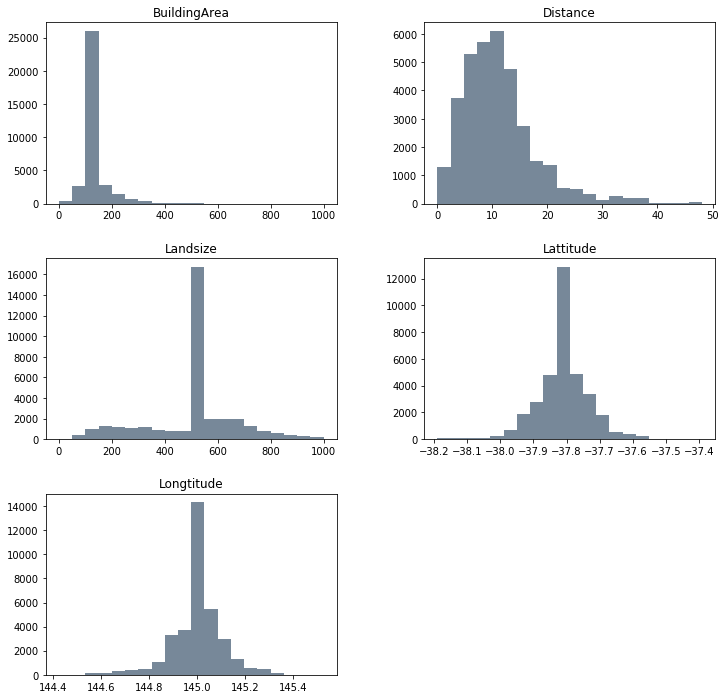

In [13]:
num_features = ['BuildingArea', 'Landsize', 'Distance', 'Lattitude', 'Longtitude']
df[num_features].hist(figsize=(12,12), bins=20, color='lightslategrey', grid=False)
plt.show()

### 3.4. Распределения категориальных переменных:

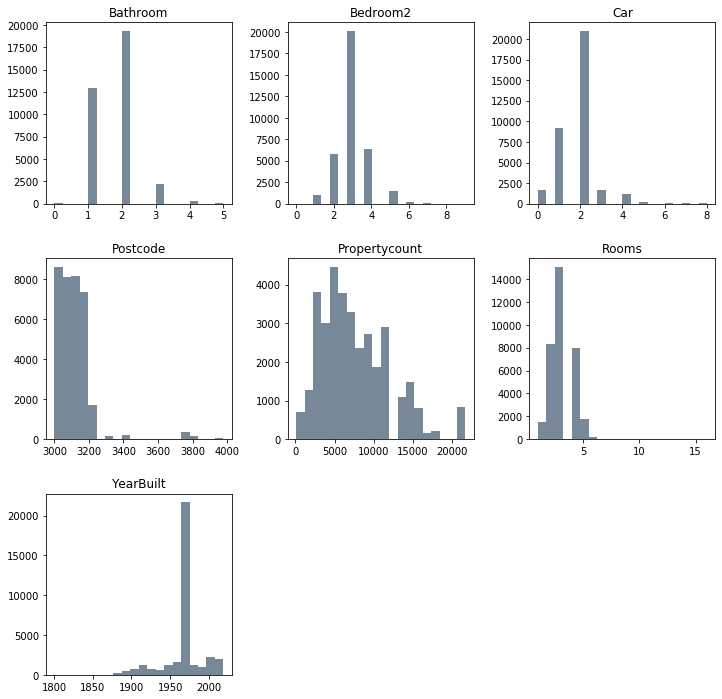

In [14]:
cat_features = ['Suburb', 'Rooms', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Propertycount']
df[cat_features].hist(figsize=(12,12), bins=20, color='lightslategrey', grid=False)
plt.show()

Анализ соотношения строковых категориальных переменных показывает относительно равномерное распределение всех значений:

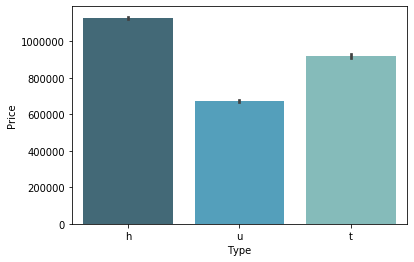

In [15]:
sns.barplot(x=df['Type'], y=df["Price"], palette='GnBu_d')

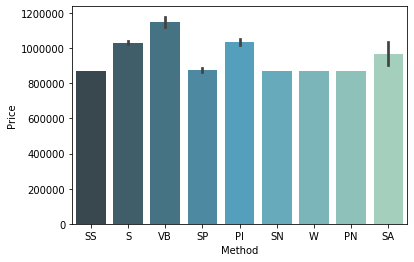

In [16]:
sns.barplot(x=df['Method'], y=df["Price"], palette='GnBu_d')

## 4. Поиск зависимостей

### 4.1. Корреляционный анализ

Text(0.5, 1, 'Correlation matrix')

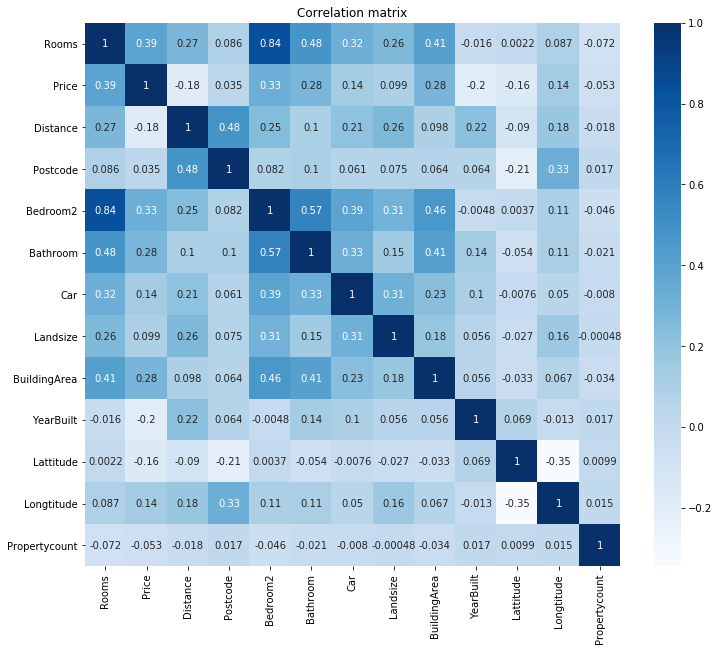

In [17]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title('Correlation matrix')

#### Выводы по корреляционному анализу:

1. Матрица корреляции Пирсона продемонстрировала наибольшую зависимость цены от количества комнат (Rooms), спален (Bedroom2), ванных комнат (Bathroom). 
2. В целом между признаками, характеризующими количество комнат (всего и определенного типа) также наблюдается сильная корреляция. 
3. Наблюдается невысокая обратная корреляцая цены и расстояния до делового центра города - чем удаленнее от центра объект, тем ниже его цена.
4. Схожая обратная зависимость наблюдается при корреляционном анализе цены и года постройки объекта.
5. Долгота незначительно положительно коррелирует с ценой - чем восточнее объект, тем выше цена. В свою очередь широта незначительно отрицательно коррелирует со стоимостью. Чем южнее объект недвижимости, тем более вероятно он дороже. Это соотносится с тем, что с юга Мельбрун омывается заливом.

<img src="https://www.godsofwarmc.com/wp-content/uploads/2019/11/Melbourne-Map-300x286.png" width=400 height=400 />

Данную тенденцию можно увидеть и на boxplot, отражающем распределение стоимости объекта в зависимости от района - объекты, расположенные в районе Southern Metropoliten, более дорогие.

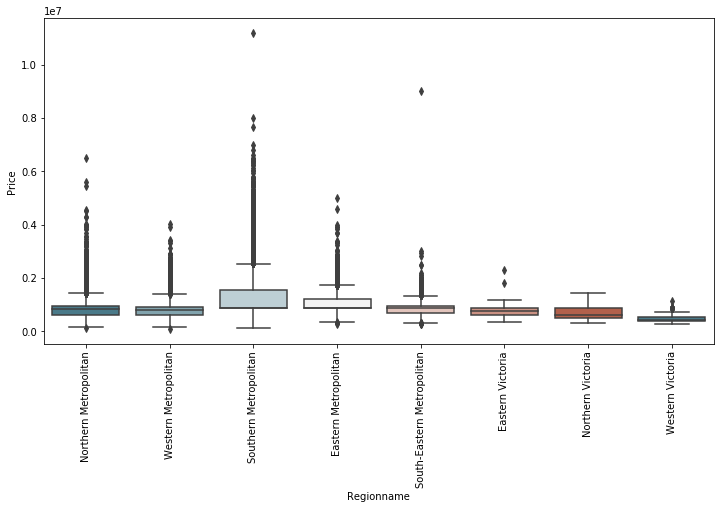

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Regionname'], y=df['Price'], palette=sns.diverging_palette(220, 20, n=7))
plt.xticks(rotation=90)
plt.show()

#### Проверим гипотезу о том, как соотносится цена объекта и район:
Среднее значение цены объекта по всей выборке = 1 050 173 австралийских доллара.

$H_0$: Средняя стоимость объектов, расположенных в районе Southern Metropoliten, составляет 1 050 173 австралийских доллара.

$H_1$: Средняя стоимость объектов, расположенных в районе Southern Metropoliten, больше 1 050 173 австралийских доллара, то есть гипотеза односторонняя.

In [19]:
southern_prices = df.loc[df['Regionname'] == 'Southern Metropolitan', 'Price']
southern_prices

133      1275000.0
134      1455000.0
135      2850000.0
136      1850000.0
137       870000.0
           ...    
34796    1025000.0
34797     870000.0
34798     870000.0
34844     440000.0
34845     870000.0
Name: Price, Length: 11839, dtype: float64

In [20]:
mu = target_mean
n = df.shape[0]
mean = southern_prices.mean()
sigma = southern_prices.std()
alpha = 0.05

print(f'Overall_mean \t\t{round(mu, 2)} \nSouthern_houses_mean \t{round(mean, 2)}')

Overall_mean 		1050173.34 
Southern_houses_mean 	1248626.08


Посчитаем t-статистику для проверки данной гипотезы по формуле:

$$ t = \frac{\overline X - \mu}{\sigma_X / \sqrt{n}}$$

In [21]:
def t_test(mean, sigma, n, mu):
    """Подсчет t-статистики
    """
    
    return (mean - mu) / (sigma / n**(1/2))

In [22]:
t_test(mean, sigma, n, mu)

48.44092201661269

Определим критическую область при уровне значимости 0.05:

In [23]:
t = stats.t.ppf(1 - alpha / 2, df = n -1)
t

1.9600320460562455

Критическая область: $\Omega_{\alpha} = (1.96, +\infty)$

Статистика попадает в критическую область => $H_0$ отвергается, и стоимость объектов домов в районе Southern Metropolinen действительно больше 1 050 173 австралийских доллара.

#### Проверим гипотезу о том, как соотносится район объекта и его размер. 
Средняя площадь объекта составляет 143.61 м$^2$.

$H_0$ Среднее значение площади объекта в районе Northern Metropolitan равно 143.61 м$^2$.

$H_1$ Среднее значение площади объекта в районе Northern Metropolitan отлично от 143.61 м$^2$.

In [24]:
nothern_BuildingArea = df.loc[df['Regionname'] == 'Northern Metropolitan', 'BuildingArea']
nothern_BuildingArea

0        136.0
1        136.0
2         79.0
3        136.0
4        150.0
         ...  
34846    136.0
34847    118.0
34848    136.0
34849    158.0
34850    135.0
Name: BuildingArea, Length: 9557, dtype: float64

In [25]:
mu = df['BuildingArea'].mean()
n = df.shape[0]
mean = nothern_BuildingArea.mean()
sigma = nothern_BuildingArea.std()
alpha = 0.05

print(f'Overall_mean \t\t\t{round(mu, 2)} \nNorthern_BuildingArea_mean \t{round(mean, 2)}')

Overall_mean 			143.61 
Northern_BuildingArea_mean 	134.85


Посчитаем t-статистику:

In [26]:
t_test(mean, sigma, n, mu)

-36.040107505333445

In [27]:
t1 = stats.t.ppf(alpha / 2, df = n-1)
t2 = stats.t.ppf(1 - alpha / 2, df = n -1)

t1, t2

(-1.960032046056246, 1.9600320460562455)

Критическая область: $\Omega_{\alpha} = (-\infty, -1.96) \cup (1.96, +\infty)$


Статистика попадает в критическую область, следовательно $H_0$ отвергаем, дома в северном районе Northern Metropolita значимо отличаются по размеру от 143.61 м$^2$.

#### Проверим гипотезу о типе дома и его цене.

$H_0$ Средняя стоимость объектов типа таунхаус в районе Western Metropolitan равна 1 050 173 австралийских доллара. 

$H_1$ Средняя стоимость объектов типа таунхаус в районе Western Metropolitan не равна 1 050 173 австралийских доллара. 

In [28]:
w_townhouse_prices = df.loc[(df['Type'] == 't') & (df['Regionname'] == 'Western Metropolitan'), 'Price']
w_townhouse_prices

66        840000.0
71        700000.0
74        420000.0
75        500000.0
82        450000.0
           ...    
34531     895000.0
34564    1180000.0
34567    1000000.0
34726     520000.0
34854     705000.0
Name: Price, Length: 654, dtype: float64

In [29]:
mu = df['Price'].mean()
n = df.shape[0]
mean = w_townhouse_prices.mean()
sigma = w_townhouse_prices.std()
alpha = 0.05

print(f'Overall_mean \t\t\t{round(mu, 2)} \nw_townhouse_prices_mean \t{round(mean, 2)}')

Overall_mean 			1010837.8 
w_townhouse_prices_mean 	749728.73


Посчитаем t-статистику:

In [30]:
t_test(mean, sigma, n, mu)

-237.26382551090816

In [31]:
t1 = stats.t.ppf(alpha / 2, df = n-1)
t2 = stats.t.ppf(1 - alpha / 2, df = n -1)

t1, t2

(-1.960032046056246, 1.9600320460562455)

Критическая область: $\Omega_{\alpha} = (-\infty, -1.96) \cup (1.96, +\infty)$


Статистика попадает в критическую область, следовательно $H_0$ отвергаем, объекты типа таунхаус в районе Western Metropolitan значимо отличаются от 1 050 173 австралийских доллара. 

#### Проверим гипотезу о возрасте дома и его стоимости:

$H_0$ Средняя стоимость объектов года постройки раньше 1900 года, удаленных от центра на больше чем 10 км, равна 1 010 837 австр. долларов.

$H_1$ Средняя стоимость объектов года постройки раньше 1900 года, удаленных от центра на больше чем 10 км, превышает 1 010 837 австр. долларов. Гипотеза односторонняя.

In [32]:
old_houses_far = df.loc[(df['YearBuilt'] < 1900) & (df['Distance'] > 10), 'Price']
old_houses_far

1654     1600000.0
1665      928000.0
1676      870000.0
1768      870000.0
1873     3700000.0
2114      870000.0
5125     2439500.0
6431     1500000.0
6453      870000.0
6514      870000.0
10044    1530000.0
10069    2003000.0
10104    1650000.0
10141     870000.0
12316    5800000.0
12359    2291000.0
13036     980000.0
13801    1600000.0
13806     870000.0
16943    1400000.0
17280     870000.0
20164     870000.0
20801    2700000.0
21513     870000.0
24417     588000.0
25408    2300000.0
25641    5410000.0
27597    1225000.0
27846     870000.0
29862     870000.0
31522    2300000.0
31933    2320000.0
32171     870000.0
33074    4600000.0
Name: Price, dtype: float64

In [33]:
mu = df['Price'].mean()
n = df.shape[0]
mean = old_houses_far.mean()
sigma = old_houses_far.std()
alpha = 0.05

print(f'Overall_mean \t\t\t{round(mu, 2)} \nold_houses_far_mean \t\t{round(mean, 2)}')

Overall_mean 			1010837.8 
old_houses_far_mean 		1769838.24


Посчитаем t-статистику:

In [34]:
t_test(mean, sigma, n, mu)

107.23616442775585

In [55]:
t = stats.t.ppf(1 - alpha / 2, df = n -1)

t

1.9600320460562455

Критическая область: $\Omega_{\alpha} =  (1.96, +\infty)$


Статистика попадает в критическую область, следовательно $H_0$ отвергаем, стоимость объектов года постройки раньше 1900 г., при этом удаленных от центра более, чем на 10 км, больше, чем 1 010 837 австр. долларов.

### 4.2. Дисперсионный анализ

Проведем дисперсионный анализ и определим значимость влияния факторов на зависимую переменную.
Для этого найдем межгрупповую и внутригрупповую дисперсию для каждого уровна k фактора X, используя следующие формулы:
$$S_b^2 = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
S_w^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$

Затем найдем значение F-статистики и квантиль распределения Фишера, чтобы проверить значимость влияния фактора на дисперсию зависимой переменной - стоимости объекта.

In [36]:
def one_factor_ANOVA(df, X_feature_name, Y_feature_name):
    """Функция подсчитывает межгрупповую и внутригрупповые дисперсии фактора, проверяет значимость влияния
    фактора на таргет с помощью теста Фишера"""
    
    level_count = {}
    level_values = {}
    level_mean = {}
    S2_b = 0
    S2_w = 0
    
    # количество уровней фактора
    X_values = df[X_feature_name].unique()
    k = len(X_values)

    # общее количество объектов в выборке
    n = df.shape[0]

    
    # средняя цена по всей выборке
    y_mean = df[Y_feature_name].mean()
    
    # записываем кол-во значений на каждом уровне, все значения цены и cреднее значение цены по каждому уровню
    for value in X_values:
        level_count['n'+ str(value)] = df[X_feature_name].value_counts().get(value)
        level_values['n'+ str(value)] = df.loc[df[X_feature_name] == value, Y_feature_name]
        level_mean['n'+ str(value)] =  df.loc[df[X_feature_name] == value, Y_feature_name].mean()

    # межуровневая дисперсия
    for key in level_mean:
        S2_b += ((level_mean[key] - y_mean)**2)*level_count[key]
    
    # внутриуровневая дисперсия
    for key in level_values:
        for item in level_values[key]:
            S2_w += (item - level_mean[key])**2
            
    # проверяем значимость       
    k1 = k - 1
    k2 = n - k
    
    sigma2_b = S2_b / k1
    sigma2_w = S2_w / k2
    
    F = sigma2_b / sigma2_w
    
    # определяем квантиль
    alpha = 0.05
    t = stats.f.ppf(1 - alpha, k1, k2)

    if F >= t:
        return round(F, 2), round(t, 2), True
    else:
        return round(F, 2), round(t, 2), False

Проверим значимость для категориальных признаков:

In [53]:
print('Factor \t\t F-test, quantile, Significance')
print('-----------------------------')
    
print('Postcode \t',one_factor_ANOVA(df, 'Postcode', 'Price'))
print('Car \t\t', one_factor_ANOVA(df, 'Car', 'Price'))
print('Suburb \t\t', one_factor_ANOVA(df, 'Suburb', 'Price'))
print('Type \t\t', one_factor_ANOVA(df, 'Type', 'Price'))
print('Method \t\t', one_factor_ANOVA(df, 'Method', 'Price'))
print('CouncilArea \t', one_factor_ANOVA(df, 'CouncilArea', 'Price'))
print('Regionname \t', one_factor_ANOVA(df, 'Regionname', 'Price'))
print('YearBuilt \t', one_factor_ANOVA(df, 'YearBuilt', 'Price'))

Factor 		 F-test, quantile, Significance
-----------------------------
Postcode 	 (45.68, 1.17, True)
Car 		 (139.9, 1.94, True)
Suburb 		 (28.78, 1.13, True)
Type 		 (2015.44, 3.0, True)
Method 		 (77.88, 1.94, True)
CouncilArea 	 (210.56, 1.44, True)
Regionname 	 (573.35, 2.01, True)
YearBuilt 	 (16.92, 1.19, True)


Дисперсионный анализ показал, что данные категориальные признаки оказывают влияние на зависимую переменную, в связи с чем можем считать их значимыми. Если сравнивать значения статистики и ух удаленность от квантилей, то можно говорить о том, что признаки Type и Regionname наиболее значимы.

### 4.2. Метод главных компонент

С целью исключить линейную зависимость между факторами, которые в последствии будут использованы для построения уравнения линейной регрессии, применим метод главных компонент.

In [38]:
def PCA(df):
    """Применение метода главных компонент к матрице факторов и оценка объясняемой дисперсии  
    """
    
    df_centered = df_num - df_num.mean()
    cov = np.cov(df_centered.T, ddof=1)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    new_data = df_centered.dot(eigenvectors[:, [1]])
    
    # проверка соотношения дисперций до и после применения метода
    variance_before = np.var(df_num, axis=0, ddof=1).sum()
    variance_after = df_num.var(ddof=1)

    return variance_after / variance_before

In [39]:
df_num = df[num_features]
PCA(df_num)

BuildingArea    9.469255e-02
Landsize        9.038540e-01
Distance        1.452852e-03
Lattitude       1.981858e-07
Longtitude      3.512485e-07
dtype: float64

Как показывает проверка соотношений дисперсий до применения метода главных компонент и после, сохранить приемлемый уровень дисперсии удалось только для переменной Landsize. Учитывая, что в данной переменной изначально было достаточно много пропусков, можно считать, что метод главных компонент для данного набора данных применять нецелесообразно.

### 4.3. Линейная зависимость

Проверим две гипотезы о зависимости цены от разных группы признаков. 

Имеется ли зависимость стоимости объекта от:
1. признаков местоположения - широты, долготы, удаленности от центра и почтового индекса;
2. признаков размера - количества комнат, спален, ванных комнат, парковочных мест, общей площади объекта и участка, на котором он располагается. 

$H_0$: Стоимость не зависит от перечисленных признаков.

In [40]:
y = df['Price']
X = df.drop('Price', axis=1)

In [41]:
feats_location = ['Longtitude', 'Lattitude', 'Distance', 'Postcode']
feats_size = ['Rooms', 'Bathroom', 'Bedroom2', 'Car', 'BuildingArea', 'Landsize']

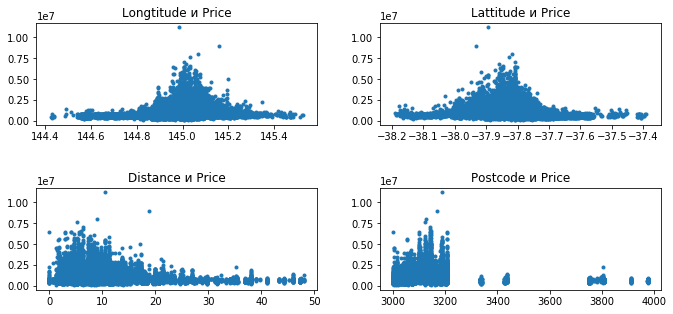

In [42]:
fig = plt.figure()

fig.set_size_inches(10, 5)

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)



ax1.scatter(x=X['Longtitude'], y=y, marker='.')
ax1.set_title('Longtitude и Price')

ax2.scatter(x=X['Lattitude'], y=y, marker='.')
ax2.set_title('Lattitude и Price')

ax3.scatter(x=X['Distance'], y=y, marker='.')
ax3.set_title('Distance и Price')

ax4.scatter(x=X['Postcode'], y=y, marker='.')
ax4.set_title('Postcode и Price')



fig.tight_layout(pad=3.0)

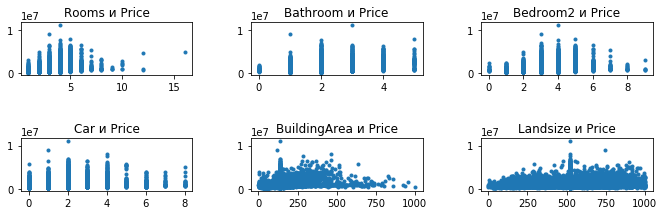

In [43]:
fig = plt.figure()

fig.set_size_inches(10, 5)

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)



ax1.scatter(x=X['Rooms'], y=y, marker='.')
ax1.set_title('Rooms и Price')

ax2.scatter(x=X['Bathroom'], y=y, marker='.')
ax2.set_title('Bathroom и Price')

ax3.scatter(x=X['Bedroom2'], y=y, marker='.')
ax3.set_title('Bedroom2 и Price')

ax4.scatter(x=X['Car'], y=y, marker='.')
ax4.set_title('Car и Price')

ax5.scatter(x=X['BuildingArea'], y=y, marker='.')
ax5.set_title('BuildingArea и Price')

ax6.scatter(x=X['Landsize'], y=y, marker='.')
ax6.set_title('Landsize и Price')

fig.tight_layout(pad=3.0)

Подберем коэффиценты уравнения линейной регрессии для данных групп признаков и рассчитаем его коэффицент детерминации $R^2$:

In [44]:
def linear_regression_r_2(X, y):
    """Подсчет коэффицента детерминации линейной регрессии
    """
  
    #  добавление к матрице столбца с единицами
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    
    # подсчет коэффицентов для уравнения линейной регрессии
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(X.T).dot(y)
    
    # подсчет ошибок
    y_pred = X.dot(b)
    e = y - y_pred
    
    # подсчет r2
    return 1 - e.var() / y.var()

In [45]:
r2_loc = linear_regression_r_2(X[feats_location], y)
r2_size = linear_regression_r_2(X[feats_size], y)

print('R2 для уравнения по признакам местоположения объекта \t', r2_loc)
print('R2 для уравнения по признакам размера объекта \t\t', r2_size)

R2 для уравнения по признакам местоположения объекта 	 0.08719499249262308
R2 для уравнения по признакам размера объекта 		 0.17911167988458232


Проверим значимость полученных коэффицентов. 

$H_0$: Коэффицент детерминации равен 0 => уравнение линейной регрессии не является значимым.

$H_1$: Коэффицент детерминации отличен от 0 => уравнение линейной регрессии является значимым.

In [46]:
def f_test(df, r2, m):
    """F-тест для проверки коэффицента детерминации
    """
    n = df.shape[0]

    k1 = m
    k2 = n - m - 1
    
    alpha = 0.05
    t = stats.f.ppf(1 - alpha, k1, k2)
    F = (r2 / k1) / ((1 - r2) / k2)
    
    if F > t:
        return True
    
    else:
        return False  

In [47]:
f_loc = f_test(X[feats_location], r2_loc, len(feats_location))
f_size = f_test(X[feats_size], r2_size, len(feats_size))

print('Значимость R2 для уравнения по признакам местоположения объекта \t', f_loc)
print('Значимость R2 для уравнения по признакам размера объекта \t\t', f_size)

Значимость R2 для уравнения по признакам местоположения объекта 	 True
Значимость R2 для уравнения по признакам размера объекта 		 True


Итак, мы можем отвергуть гипотезу о том, что стоимость не зависит от пространственных и размерных признаков объекта. Также мы видим, что коэффицент детерминации в обоих случаях достаточно мал, что означает, что доля объясняемой моделью дисперсии все же незначительна. 

Тем не менее, уравнения линейной регрессии значимы => Небольшая зависимость между стоимостью и данными характеристиками есть. 

При этом, установлено, что зависимость между стоимостью и размерными признаками объекта значительно выше признаков местоположения. Это позволяет говорить о том, что объект более вероятно стоит дороже, если его площадь и участок больше, и соответственно в нем больше комнат и парковочных мест.

Проверим, насколько значимым будет уравнение регрессии, если мы учтем все вышеперечисленные признаки + год постройки объекта:

In [48]:
feats_all = ['Rooms', 'Bathroom', 'Bedroom2', 'Car', 'BuildingArea',
             'Landsize', 'Longtitude', 'Lattitude', 'Distance', 'Postcode', 'YearBuilt']

r2_all = linear_regression_r_2(X[feats_all], y)
f_all = f_test(X[feats_location], r2_loc, len(feats_location))

print('R2 \t\t', r2_all)
print('Значимость R2 \t', f_all)

R2 		 0.33724767945685485
Значимость R2 	 True


Мы видим, что в совокупности признаки дают более эффективное значимое уравнение линейной регрессии (с учетом того, что $R^2$ уравнения только по году постройки всего 0.03).

### Выводы

Итак, были установлены и проверены следующие закономерности:
    
1. Объекты в районе Southern Metropolitan в среднем стоят больше, чем в среднем объекты по всем районам.
2. Объекты в районе Northern Metropolitan значимо отличаются по размеру от средних по выборке.
3. Таунхаусы в районе Western Metropolitan значимо отличаются по стоимости от средних по выборке.
4. Стоимость объектов года постройки раньше 1900 и удаленных от центра более, чем на 10 км, выше средней по выборке.
5. Категориальные признаки оказывают значимое влияние на цену объекта, наиболее значимые признаки - район и тип объекта (дом, комната и т.д.).
6. Цена объекта проявляет бОльшую зависимость от признаков, связанных с размером объекта, нежели от признаков, связанных с его расположением.